**Computer Vision**

Computer vision is a branch of Artificial Intelligence (AI) that enables computers and systems to derive meaningful information from digital images behaving accordingly. 

Computer vision works as human vision, except humans have the upside of context to train how to distinguish between objects, how far away they are, whether they are moving and whether there is something wrong in an image, etc.

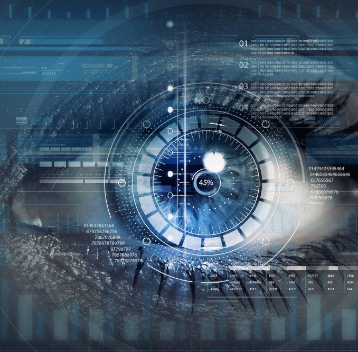

# All General Imports

In [ ]:
# general imports
import keras
import numpy as np
import pdb
import matplotlib.pyplot as plt
import random

# All Machine Learning Imports

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

# All Globals

In [ ]:
input_dim = 784
default_callbacks = []
f_mnist = True            # True: Fashion Mnist, False: Mnist
normalization = True
save_best_model = True    # True: Save The Best Model, False: Save the last model 

# All Downloads

download mnist fashion mnist data and split them into train and test sets


In [ ]:
if f_mnist is True: 
  (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
else: 
  (X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Visualization for Inspection

Show the first image from the training and test sets


First fashion mnist train image 9


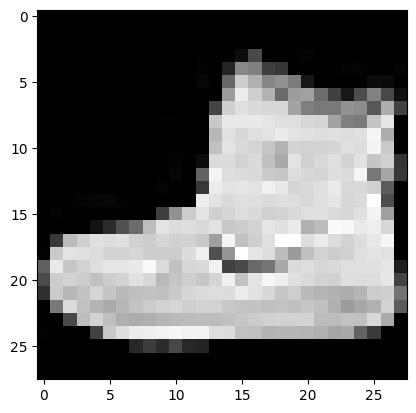

First fashion mnist test image 9


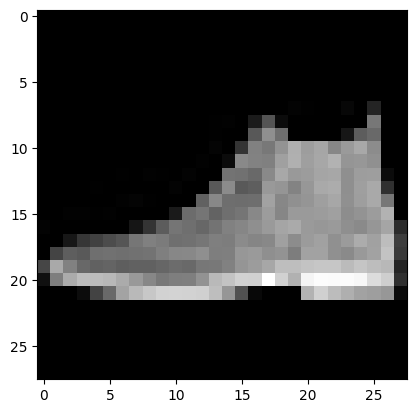

In [ ]:
for k in range(1):
    plt.imshow(X_train[k], cmap = 'gray')
    plt.savefig("first_fashion_mnist_train_image_"+str(k)+".jpg")
    print("First fashion mnist train image", y_train[0])
    plt.show(block = False)
    plt.pause(3)
    plt.close()

for k in range(1):
    plt.imshow(X_test[k], cmap = 'gray')
    plt.savefig("first_fashion_mnist_test_image"+str(k)+".jpg")
    print("First fashion mnist test image", y_test[0])
    plt.show(block = False)
    plt.pause(3)
    plt.close()

# Tensors Reshaping and Training

In [ ]:
X_train = X_train.reshape(60000,784)                # linearization of image data (which is 2-dimensional originally) because our model is mlp, so accept only linear data, unlike convolutional networks
X_test = X_test.reshape(10000,784)

# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=input_dim))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
model.summary()

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                25120     
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if save_best_model is True:
  checkPoint=ModelCheckpoint("mlp.h5", save_weights_only=True, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
  default_callbacks = default_callbacks+[checkPoint]

earlyStopping=EarlyStopping(monitor='val_loss', min_delta = 0.001, patience=7, verbose=0, mode='min') 
default_callbacks = default_callbacks+[earlyStopping]

# Train the model, iterating on the data in batches of 32 samples
# 2) add hist variable
hist = model.fit(X_train, y_train, validation_split = 0.2, epochs=100, batch_size=128, 
                                        callbacks = default_callbacks, verbose = 1)
                                                                                
if save_best_model is False: 
  model.save_weights("mlp.h5")
else:  #1) save model to be able to load the file w/ model.load
  model.save('mlp.h5') #1)


score = model.evaluate(X_test, y_test, batch_size=5000)
print(score)

Epoch 1/100
375/375 [==============================] - ETA: 0s - loss: 0.6884 - accuracy: 0.7685
Epoch 1: val_accuracy improved from -inf to 0.82042, saving model to mlp.h5
375/375 [==============================] - 2s 3ms/step - loss: 0.6884 - accuracy: 0.7685 - val_loss: 0.5174 - val_accuracy: 0.8204
Epoch 2/100
357/375 [===========================>..] - ETA: 0s - loss: 0.4822 - accuracy: 0.8339
Epoch 2: val_accuracy improved from 0.82042 to 0.83817, saving model to mlp.h5
375/375 [==============================] - 1s 3ms/step - loss: 0.4829 - accuracy: 0.8333 - val_loss: 0.4694 - val_accuracy: 0.8382
Epoch 3/100
372/375 [============================>.] - ETA: 0s - loss: 0.4421 - accuracy: 0.8454
Epoch 3: val_accuracy improved from 0.83817 to 0.84733, saving model to mlp.h5
375/375 [==============================] - 1s 3ms/step - loss: 0.4418 - accuracy: 0.8455 - val_loss: 0.4369 - val_accuracy: 0.8473
Epoch 4/100
369/375 [============================>.] - ETA: 0s - loss: 0.4185 - ac

Homework: 

1) Say the difference (discover) between saving only the weights and saving the model (save_model) 

2) Whats the difference of accuracy between best model and last model on the Test Set

3) Try this model on Cifar10 from keras datasets

4) Make post-processing analysis: piechart of classifications of test, comparations, number of wrong classifications, visualizations of bad classifications, etc. 

In [ ]:
#1 Say the difference (discover) between saving only the weights and saving the model (save_model)
if save_best_model is False: 
  model.load_weights("mlp.h5")
else:  #1) Cannot load model without having a save! only saving weights isn't enough to a model load
  model = keras.models.load_model('mlp.h5')
  
#save - is slower #weights - faster

**2) Whats the difference of accuracy between best model and last model on the Test Set**


In [ ]:
#After 1) loadmodel
if save_best_model is True:
  model = keras.models.load_model('mlp.h5')
  print("best model - accuracy")
  print(model.evaluate(X_test, y_test, batch_size=5000))

print("last - accuracy")
print(hist.history['val_accuracy'][-1])

#validation_accuracy is the right variable to check

print("The last model had better accuracy results than the best model that have been saved because.")
print("Model checkpoint is 'watching' val_accuracy and in this variable the last model didn't had better result.")


best model - accuracy
2/2 [==============================] - 0s 11ms/step - loss: 0.3873 - accuracy: 0.8707
[0.3873486816883087, 0.8707000017166138]
last - accuracy
0.8777499794960022
The last model had better accuracy results than the best model that have been saved because.
Model checkpoint is 'watching' val_accuracy and in this variable the last model didn't had better result.


**3) Try this model on Cifar10 from keras datasets**

In [ ]:
(X_train_cf10, y_train_cf10), (X_test_cf10, y_test_cf10) = keras.datasets.cifar10.load_data()
#Same model new input
input_dim_cf10 = 3072
#The model needs to have different input!?
X_train_cf10 = X_train_cf10.reshape(50000,3072)                # linearization of image data (which is 2-dimensional originally) because our model is mlp, so accept only linear data, unlike convolutional networks
X_test_cf10 = X_test_cf10.reshape(10000,3072)
# Normalization
X_train_cf10 = X_train_cf10 / 255.0
X_test_cf10 = X_test_cf10 / 255.0
#y - train set/test set 
# Convert labels to categorical one-hot encoding
y_train_cf10 = to_categorical(y_train_cf10, num_classes=10)
y_test_cf10 = to_categorical(y_test_cf10, num_classes=10)

#Tried to use model and reshape the first layer couldn't
#Somewhere on tensorflow documentation when i add a Dense an InputLayer is added in background
#Couldn't access it to reshape input - dont know how
#so made a new one #same configuration
model_cf10 = Sequential()
model_cf10.add(Dense(32, activation='relu', input_dim=input_dim_cf10))
model_cf10.add(Dense(10, activation='softmax'))
model_cf10.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model_cf10.summary()
#rename file from callback 
model_cf10.fit(X_train_cf10, y_train_cf10, validation_split = 0.2, epochs=100, batch_size=64,callbacks = default_callbacks, verbose = 1)
score = model_cf10.evaluate(X_test_cf10, y_test_cf10, batch_size=5000)
print(score)
print("Same model by copy of parameters very low accuracy") #not good for colored images #good for gray scale images

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                98336     
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
618/625 [============================>.] - ETA: 0s - loss: 2.1353 - accuracy: 0.2187
Epoch 1: val_accuracy did not improve from 0.87858
625/625 [==============================] - 3s 5ms/step - loss: 2.1334 - accuracy: 0.2195 - val_loss: 1.9991 - val_accuracy: 0.2751
Epoch 2/100
614/625 [============================>.] - ETA: 0s - loss: 1.9625 - accuracy: 0.2763
Epoch 2: val_accuracy did not improve from 0.87858
625/625 [==========

**4) Make post-processing analysis: piechart of classifications of test, comparations, number of wrong classifications, visualizations of bad classifications, etc.** 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


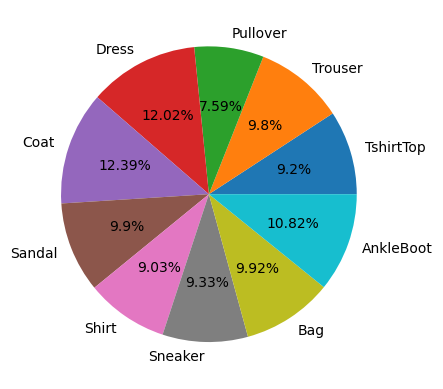

In [ ]:
predict_prob = model.predict(X_test)
predict_classes = np.argmax(predict_prob,axis=1)
#arr1 = model.predict_classes(X_test)
#import pandas as pd
df = pd.DataFrame(predict_classes)
#df.head(20)
#df = pd.DataFrame(predict_prob).apply(lambda x: x * 100)
#df = round(df,4)
#df.head(20)

TshirtTop = df[df.iloc[:,0] == 0].count()
Trouser = df[df.iloc[:,0] == 1].count()
Pullover = df[df.iloc[:,0] == 2].count()
Dress = df[df.iloc[:,0] == 3].count()
Coat = df[df.iloc[:,0] == 4].count()
Sandal = df[df.iloc[:,0] == 5].count()
Shirt = df[df.iloc[:,0] == 6].count()
Sneaker = df[df.iloc[:,0] == 7].count()
Bag = df[df.iloc[:,0] == 8].count()
AnkleBoot = df[df.iloc[:,0] == 9].count()
x = [TshirtTop,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,AnkleBoot]
fig, ax = plt.subplots()
def perc_value(val): 
  return str(round(val,2)) + "%"
##ax.pie(x,colors=['green','red'],labels=["Machines w/ no failure","Machines w/ failure"],autopct=perc_value)
ax.pie(x,labels=["TshirtTop","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","AnkleBoot"],autopct=perc_value)
plt.show()

#df = pd.DataFrame(x)
#print(df)


In [ ]:
predict_prob = model.predict(X_test)
predict_classes = np.argmax(predict_prob,axis=1)
#df = pd.DataFrame(predict_prob)
df = pd.DataFrame(predict_prob).apply(lambda x: x * 100)
df = round(df,4)
#df.head(20)
#s1 = pd.Series(predict_classes)
#s2 =  pd.Series(df.max(axis=1))
df1 = pd.DataFrame(predict_classes,columns=['Type'])
df2 = pd.DataFrame(df.max(axis=1),columns=['Accuracy'])
df3 = pd.concat([df1, df2],names=['Type','Accuracy'], axis=1)
#df3.head(20)
#0.86 
df3["acc"] = df3["Accuracy"].apply(lambda x: True if(x >= 86) else False)
def type_name(x):
    if x == 0:
        return "T-shirt/top"
    elif x == 1:
        return "Trouser"
    elif x == 2:
        return "Pullover"
    elif x == 3:
        return "Dress"
    elif x == 4:
        return "Coat"
    elif x == 5:
        return "Sandal"
    elif x == 6:
        return "Shirt"
    elif x == 7:
        return "Sneaker"
    elif x == 8:
        return "Bag"
    elif x == 9:
        return "Ankle Boot"
df3["Type_name"] = df3["Type"].apply(type_name)
df3.head(20)


,Type,Accuracy,acc,Type_name
0,9,98.495796,True,Ankle Boot
1,2,99.241997,True,Pullover
2,1,100.000000,True,Trouser
3,1,99.987503,True,Trouser
4,6,57.907299,False,Shirt
5,1,99.996902,True,Trouser
6,4,99.245399,True,Coat
7,6,73.522400,False,Shirt
8,5,99.737396,True,Sandal
9,7,99.608200,True,Sneaker


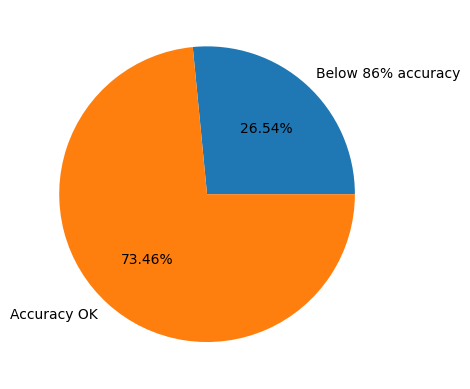

In [ ]:
bel86 = df3[df3["Accuracy"] < 86]['Type'].count()
accok = df3[df3["Accuracy"] >= 86]['Type'].count()
#print(accok)
x = [bel86,accok]
fig, ax = plt.subplots()
def perc_value(val): 
  return str(round(val,2)) + "%"
###ax.pie(x,colors=['green','red'],labels=["Machines w/ no failure","Machines w/ failure"],autopct=perc_value)
ax.pie(x,labels=["Below 86% accuracy","Accuracy OK"],autopct=perc_value)
plt.show()


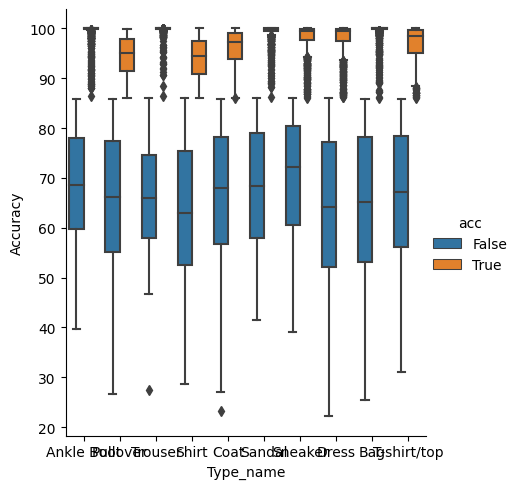

In [ ]:


import seaborn as sns
#sns.catplot(x="Type_name", y="Accuracy", hue="acc", aspect=.9,kind="swarm", data=df3)
sns.catplot(x="Type_name", y="Accuracy", hue="acc", aspect=.9,kind="box", data=df3)
plt.show()

Type_name    Shirt
Name: 4, dtype: object Accuracy    57.907299
Name: 4, dtype: float32
Type_name    Shirt
Name: 7, dtype: object Accuracy    73.5224
Name: 7, dtype: float32
Type_name    Sandal
Name: 12, dtype: object Accuracy    51.705399
Name: 12, dtype: float32
Type_name    Pullover
Name: 17, dtype: object Accuracy    73.434601
Name: 17, dtype: float32


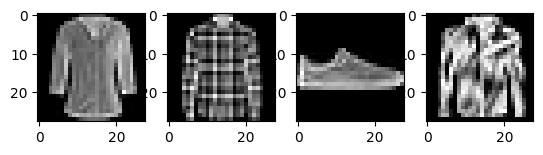

In [ ]:
#mostrar imagens mal
#df4 = pd.DataFrame([df3[df3["acc"] == False].head(20).index,df3[df3["acc"] == False]['Type'].head(20)],columns=['ind','dummy'])
df4 = pd.DataFrame(df3[df3["acc"] == False].head(4).index,columns=['index'])
df5 = pd.DataFrame(df3[df3["acc"] == False]['Type_name'].head(4),columns=['Type_name'])
df7 = pd.DataFrame(df3[df3["acc"] == False]['Accuracy'].head(4),columns=['Accuracy'])
#df3[df3["acc"] == False]['Type_name'].head(4)
#df4.head(4)
#df5.head(4)
#df6 = pd.concat([df4,df5])
#df6.head(4)

if f_mnist is True: 
  (X_train_1, y_train_1), (X_test_1, y_test_1) = fashion_mnist.load_data()
else: 
  (X_train_1, y_train_1), (X_test_1, y_test_1) = mnist.load_data()

fig, ax = plt.subplots(1, 4)
for i in range(4):  
  print(df5.iloc[i],df7.iloc[i])
  ax[i].imshow(X_test_1[df4.iloc[i,0]], cmap=plt.get_cmap('gray'))

plt.show()


**Images LAB**

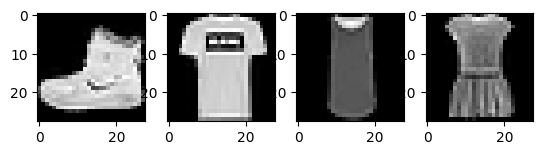

In [ ]:
if f_mnist is True: 
  (X_train_1, y_train_1), (X_test_1, y_test_1) = fashion_mnist.load_data()
else: 
  (X_train_1, y_train_1), (X_test_1, y_test_1) = mnist.load_data()

fig, ax = plt.subplots(1, 4)
for i in range(4):  
  ax[i].imshow(X_train_1[i], cmap=plt.get_cmap('gray'))

plt.show()